In [220]:
import pandas as pd
import numpy as np 
from bokeh.plotting import figure, output_file, show
from datetime import timedelta

In [221]:
msft = pd.read_csv("./MSFT_US.csv", index_col="Date", parse_dates=["Date"])
predictions = pd.read_csv("./prediction_MSFT.csv", index_col="Date", parse_dates=["Date"])
msft.head()

,Open,High,Low,Close,Adjusted_close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [222]:
index = msft[msft.index == predictions.index[0]].index[0]
msft2 = msft[index:msft.index[-3]]
print(len(msft2) == len(predictions))

False


In [223]:
msft2["Prediction"] = predictions["Prediction_close"]
msft2 = msft2.dropna()
msft2.head()

c:\users\leon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adjusted_close,Volume,Prediction
Date,,,,,,,
2013-06-20,34.259998,34.330002,33.369999,33.490002,28.841101,54493700,29.153980
2013-06-21,33.660000,33.730000,33.049999,33.270000,28.651623,85338500,28.920525
2013-06-24,32.939999,34.200001,32.570000,33.720001,29.039160,56109000,29.104958
2013-06-25,34.080002,34.380001,33.459999,33.669998,28.996105,44073400,28.990222
2013-06-26,34.119999,34.480000,33.889999,34.349998,29.581703,48665900,29.355113


In [224]:
positions = []
for i in range(4,len(msft2["Close"])):
    prediction_values = msft2["Prediction"][i-4:i]
    if msft2["Adjusted_close"][i] < prediction_values.max():
        positions.append(1)
    else:
        positions.append(0)
msft2 = msft2[4:]
print(len(msft2) == len(positions))
msft2["Position"] = positions
msft2["Position"] = msft2["Position"].shift()
msft2 = msft2.dropna()

True


In [225]:
msft2["StrategyPct"] = msft2["Adjusted_close"].pct_change(1) * msft2["Position"]
msft2["Strategy"] = (msft2["StrategyPct"] + 1).cumprod()
msft2["BuyHold"] = (msft2["Adjusted_close"].pct_change(1) + 1).cumprod()

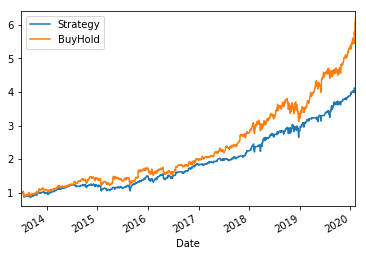

In [226]:
msft2[["Strategy","BuyHold"]].plot()